최근까지 전 세계적으로 문제시 되고 있는 코로나에 대해 분석해보았습니다.
데이터는 제가 주로 이용하는 KAGGLE에서 가져왔으며,
##데이터 수집 -> 데이터 구조 파악 -> 데이터 정리 -> 데이터 시각화 -> 결론도출##
순으로 분석 후 결론까지 도출하는 내용을 담았습니다. 감사합니다.

##1.데이터 수집
 출처:'https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv'

###라이브러리 import

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

###csv 파일 업로드

In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


## 2. 데이터 구조 파악하기

###데이터 pandas로 불러오기

In [3]:
coronaDF = pd.read_csv("covid_19_clean_complete.csv")

###데이터 확인하기

In [4]:
coronaDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


###결측 값 확인

In [5]:
coronaDF.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

### 데이터 타입 조회

In [6]:
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


### Date 정보 수정 (Object => datetime)

In [7]:
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])
coronaDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


# 코로나 바이러스 데이터 분석 - 국가별 최신 확진자, 사망자, 회복자 데이터 분석



### 최신 데이터만 남기기


In [8]:
latestDF = coronaDF[coronaDF['Date'] == max(coronaDF['Date'])]
latestDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### 국가별 합계 구하기

In [9]:
latest_country_sum = latestDF.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
latest_country_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
182,West Bank and Gaza,10621,78,3752
183,Western Sahara,10,1,8
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


### 확진자 높은 국가순으로 정렬하기

In [10]:
latest_country_sum = latest_country_sum.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
latest_country_sum

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
...,...,...,...,...
182,Dominica,18,0,18
183,Saint Kitts and Nevis,17,0,15
184,Greenland,14,0,13
185,Holy See,12,0,12


### 데이터 전체 조회하기


In [11]:
latest_country_sum.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,US,4290259,148011,1325804
1,Brazil,2442375,87618,1846641
2,India,1480073,33408,951166
3,Russia,816680,13334,602249
4,South Africa,452529,7067,274925
5,Mexico,395489,44022,303810
6,Peru,389717,18418,272547
7,Chile,347923,9187,319954
8,United Kingdom,301708,45844,1437
9,Iran,293606,15912,255144


# 코로나 바이러스 데이터 분석 - 시간에 따른 확진자, 사망자, 회복자 시각화

###날짜별 확진자, 사망자, 회복자 합계 구하기

In [12]:
date_status = coronaDF.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
date_status = date_status.sort_index()
date_status

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


### 시간에 따른 누적 확진자, 사망자, 회복자 그래프 (seaborn lineplot)

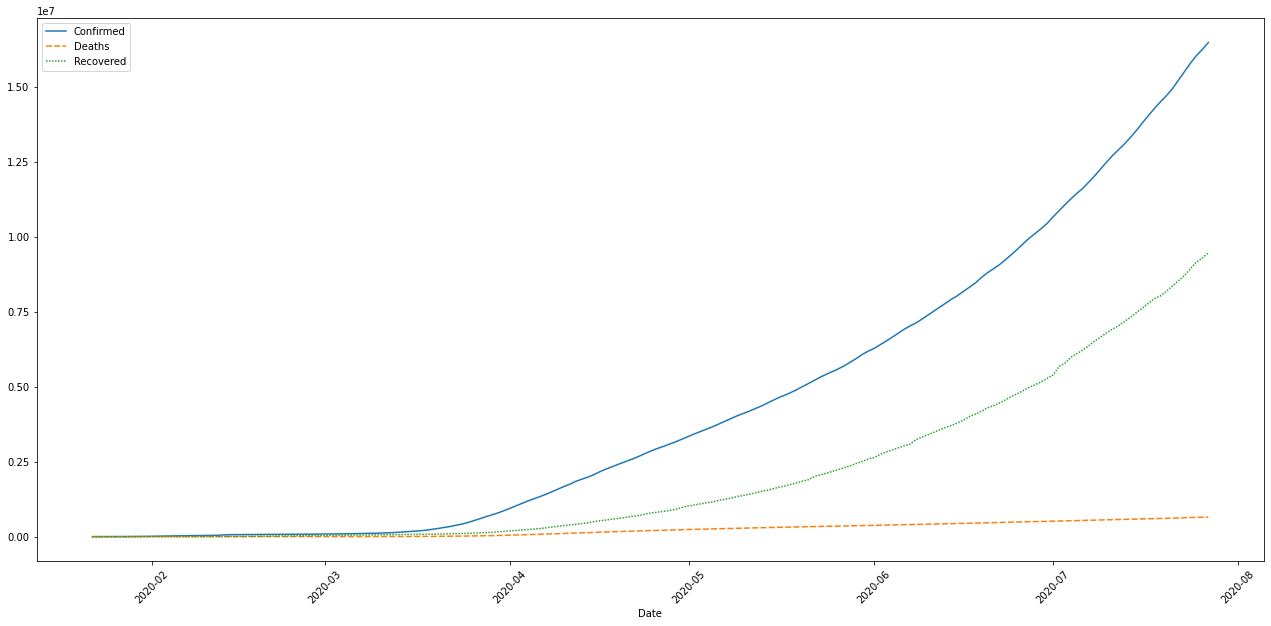

In [13]:
plt.figure(figsize=(22,10))
plt.xticks(rotation = 45 )
sns.lineplot(data=date_status)

#전세계 코로나 바이러스 감염 지도 표시 - 전세계 코로나 바이러스 감염 지도 시각화

### 국가별 최신 확진자 데이터 조회

In [14]:
latestDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [15]:
#확진자수가 많은 국가 10개 까지 조회
latestDF.sort_values(by='Confirmed',ascending=False).head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49030,NaN,US,40.000000,-100.000000,2020-07-27,4290259,148011,1325804,2816444,Americas
48835,NaN,Brazil,-14.235000,-51.925300,2020-07-27,2442375,87618,1846641,508116,Americas
48936,NaN,India,20.593684,78.962880,2020-07-27,1480073,33408,951166,495499,South-East Asia
48992,NaN,Russia,61.524010,105.318756,2020-07-27,816680,13334,602249,201097,Europe
49005,NaN,South Africa,-30.559500,22.937500,2020-07-27,452529,7067,274925,170537,Africa
48963,NaN,Mexico,23.634500,-102.552800,2020-07-27,395489,44022,303810,47657,Americas
48986,NaN,Peru,-9.190000,-75.015200,2020-07-27,389717,18418,272547,98752,Americas
48854,NaN,Chile,-35.675100,-71.543000,2020-07-27,347923,9187,319954,18782,Americas
49028,NaN,United Kingdom,55.378100,-3.436000,2020-07-27,300111,45759,0,254352,Europe
48938,NaN,Iran,32.427908,53.688046,2020-07-27,293606,15912,255144,22550,Eastern Mediterranean


In [18]:
#확진자수가 적은 국가 10개 까지 조회
latestDF.sort_values(by='Confirmed',ascending=False).tail(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49059,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,2020-07-27,13,0,13,0,Europe
49027,Montserrat,United Kingdom,16.742498,-62.187366,2020-07-27,12,1,10,1,Europe
48932,NaN,Holy See,41.902900,12.453400,2020-07-27,12,0,12,0,Europe
49062,NaN,Western Sahara,24.215500,-12.885800,2020-07-27,10,1,8,1,Africa
49053,British Virgin Islands,United Kingdom,18.420700,-64.640000,2020-07-27,8,1,7,0,Europe
48918,Saint Barthelemy,France,17.900000,-62.833300,2020-07-27,7,0,6,1,Europe
49048,Northwest Territories,Canada,64.825500,-124.845700,2020-07-27,5,0,0,5,Americas
49060,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-07-27,4,0,1,3,Europe
49052,Anguilla,United Kingdom,18.220600,-63.068600,2020-07-27,3,0,3,0,Europe
48884,Tibet,China,31.692700,88.092400,2020-07-27,1,0,1,0,Western Pacific


In [22]:
latestDF_lowconfirm=latestDF.groupby('Country/Region')['Confirmed','Deaths','Recovered','Active'].sum().sort_values(by='Confirmed')
latestDF_lowconfirm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Western Sahara,10,1,8,1
Holy See,12,0,12,0
Greenland,14,0,13,1
Saint Kitts and Nevis,17,0,15,2
Dominica,18,0,18,0
Laos,20,0,19,1
Grenada,23,0,23,0
Timor-Leste,24,0,0,24
Saint Lucia,24,0,22,2


### 지도에 전세계 국가별 확진자 수 CircleMarker로 표시

In [17]:
import folium

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=4)
for n in latestDF.index:
    folium.CircleMarker([latestDF['Lat'][n], latestDF['Long'][n]], radius = int(latestDF['Confirmed'][n]/10000)
    , color='red', fill="True", fill_color='red', popup=latestDF['Country/Region'][n] + ":" + str(latestDF['Confirmed'][n])).add_to(m)
m

##결론
지도화와 차트를 통해 국가별 확진자수를 확인해보았다. 우선 확진자수가 월등히 높은 미국,브라질,인도,러시아,남아공과 같은 나라는 확진자가 월등히 높으므로, 더욱 강력한 입출국 규제가 필요할 것으로 보인다.

확진자가 낮은 국가를 한번 보면 Western Sahara,Holy See,Greenland,Saint Kitts and Nevis,Dominica 등이 있는 데, 이러한 나라들이 확진자가 적다고 입출국 규제를 완화해도 될까? 안된다. 이 나라들은 인구가 극히 적인 나라들로 인구당 확진자수로 봤을 때 결코 낮은 수치가 아니다. 이러한 국가들에 대한 입출국 규제 역시 간과해서는 안된다.
